XGBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
dropped_columns = ['period','city_name','subject_type','subject_name','hex','hex-2','f7','f6','f13']
#dropped_columns = []
df = pd.read_csv('train_v8.csv', sep=",")
df = df.sample(frac=1).reset_index(drop=True)
# Удаляем колонку education (потому что есть уже закодированная колонка education-num)
df = df.drop('Unnamed: 0', axis=1)
#df = df.drop(['period','subject_name','city_name','hex'], axis=1)
df = df.drop(dropped_columns, axis=1)
df['KMeans(100)'] = df['KMeans(100)'].astype('str')

#df['population_by_area'] = df['population']/df['area']
# Кодируем отклик в бинарные значения
#df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
# удаляем строки с NA значениями
df = df.fillna(-1)
#df = df.dropna()

# copy the data


#df['city_and_region'] = df['city_name'].astype(str) + ';' + df['subject_name'].astype(str) + ' ' + df['subject_type'].str.lower()

test = pd.read_csv('test_v8.csv', sep=",")
test = test.sample(frac=1).reset_index(drop=True)
#test = test.drop(['period','subject_name','city_name','hex'], axis=1)
test = test.drop(dropped_columns, axis=1)
test['KMeans(100)'] = test['KMeans(100)'].astype('str')
#test['population_by_area'] = test['population']/test['area']
test = test.drop('Unnamed: 0', axis=1)
#test['income'] = test['income'].map({' <=50K.': 0, ' >50K.': 1})
test = test.fillna(-1)
#test = test.dropna()


In [69]:
pd.DataFrame(df['city_and_region'].unique()).to_csv('city_and_region.csv',index=False)

In [3]:
df.head()

,label,hex_lat,hex_lon,f1,f2,f3,f4,f5,f8,f9,...,count,count0,count1,count0p,count1p,salary,population,area,density,KMeans(100)
0,0,52.779633,32.202767,0.00073,0.00107,0.00140,0.00287,0.0,0.00000,0.00000,...,147,145,2,0.986395,0.013605,31946.0,1168771,34857,33.530453,67
1,0,55.144616,36.597288,0.00016,0.00019,0.00034,0.02012,0.0,0.00000,0.00000,...,303,297,6,0.980198,0.019802,43994.0,1012844,29777,34.014306,67
2,0,59.990506,30.332463,0.00017,0.00084,0.00072,0.00000,0.0,0.00000,0.00000,...,866,843,23,0.973441,0.026559,68667.0,5377503,1403,3832.860299,66
3,0,55.354012,42.185788,0.00035,0.00030,0.00042,0.00000,0.0,0.00066,0.00066,...,126,126,0,1.000000,0.000000,-1.0,3144254,76624,41.034845,92
4,0,62.022415,129.772230,0.00189,0.00186,0.00250,0.00000,0.0,0.00000,0.00000,...,800,789,11,0.986250,0.013750,77178.0,992115,3083523,0.321747,83


In [4]:
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in ["count","count0","count1","count0p","count1p","salary","population","area",'hex_lon','hex_lat']:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
    
# copy the data
test_max_scaled = test.copy()
  
# apply normalization techniques
for column in  ["count","count0","count1","count0p","count1p","salary","population","area",'hex_lon','hex_lat']:
    test_max_scaled[column] = test_max_scaled[column]  / test_max_scaled[column].abs().max()


In [5]:
df_max_scaled.head()

,label,hex_lat,hex_lon,f1,f2,f3,f4,f5,f8,f9,...,count,count0,count1,count0p,count1p,salary,population,area,density,KMeans(100)
0,0,0.789266,0.227459,0.00231,0.00240,0.00325,0.00000,0.0000,0.00000,0.00000,...,0.075019,0.078990,0.000000,1.000000,0.000000,0.481312,0.614847,0.014376,175.254980,27
1,0,0.763532,0.296486,0.00144,0.00088,0.00076,0.00575,0.0087,0.00066,0.00066,...,0.017015,0.017915,0.000000,1.000000,0.000000,0.321184,0.247852,0.017371,58.465789,27
2,0,0.818799,0.245016,0.00136,0.00170,0.00201,0.00287,0.0000,0.00033,0.00033,...,0.044857,0.047231,0.000000,1.000000,0.000000,0.241071,0.077316,0.006952,45.571582,67
3,0,0.783355,0.488816,0.00071,0.00074,0.00085,0.00000,0.0000,0.00000,0.00000,...,0.129157,0.132736,0.019417,0.976048,0.023952,0.344278,0.220039,0.057647,15.641059,77
4,0,0.639141,0.223707,0.00064,0.00064,0.00084,0.00000,0.0000,0.00000,0.00000,...,0.275329,0.284202,0.033981,0.980337,0.019663,0.319120,0.450112,0.024480,75.344479,77


In [5]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Using TensorFlow backend.


In [6]:
X_train = pd.get_dummies(df_max_scaled).drop('label', axis=1)
y_train = df_max_scaled['label']

X_test = pd.get_dummies(test_max_scaled).drop('label', axis=1)
y_test = test_max_scaled['label']

In [7]:
X_train.head()

,hex_lat,hex_lon,f1,f2,f3,f4,f5,f8,f9,f10,...,KMeans(100)_90,KMeans(100)_91,KMeans(100)_92,KMeans(100)_93,KMeans(100)_94,KMeans(100)_95,KMeans(100)_96,KMeans(100)_97,KMeans(100)_98,KMeans(100)_99
0,0.756967,0.189038,0.00073,0.00107,0.00140,0.00287,0.0,0.00000,0.00000,0.12606,...,0,0,0,0,0,0,0,0,0,0
1,0.790886,0.214835,0.00016,0.00019,0.00034,0.02012,0.0,0.00000,0.00000,0.12655,...,0,0,0,0,0,0,0,0,0,0
2,0.860386,0.178059,0.00017,0.00084,0.00072,0.00000,0.0,0.00000,0.00000,0.12587,...,0,0,0,0,0,0,0,0,0,0
3,0.793889,0.247641,0.00035,0.00030,0.00042,0.00000,0.0,0.00066,0.00066,0.12690,...,0,0,1,0,0,0,0,0,0,0
4,0.889528,0.761796,0.00189,0.00186,0.00250,0.00000,0.0,0.00000,0.00000,0.13292,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print (len(X_train.columns))
print (len(X_test.columns))
# Приводим множество названий колонок к типу set, находим разность двух множеств.
print(set(X_train.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X_train.columns))

138
135
{'KMeans(100)_89', 'KMeans(100)_33', 'KMeans(100)_31'}
set()


In [9]:
columns = set(X_train.columns) | set(X_test.columns)
X_train = X_train.reindex(columns=columns).fillna(-1)
X_test = X_test.reindex(columns=columns).fillna(-1)
all(X_train.columns == X_test.columns)

True

In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [48]:
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.numpy_function(roc_auc_score, (y_true, y_pred), tf.double)

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


class MyLRSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, initial_learning_rate):
    self.initial_learning_rate = initial_learning_rate

  def __call__(self, step):
     return self.initial_learning_rate / (step + 1)
    
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    decay_rate=0.9)
checkpoint_filepath = 'checkpoint1'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_f1_m',
    mode='max',
    save_best_only=True)
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[precision_m,recall_m, f1_m])
"""model.compile(loss=tf.keras.losses.Poisson(reduction="auto", name="poisson"), optimizer=tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad"
), metrics=[tf.keras.metrics.AUC(),precision_m,f1_m, recall_m])"""
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auroc])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               71168     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [54]:
model.load_weights('checkpoint1')

In [50]:
class_weight = {0: 1.,
                1: 40.}

model.fit(X_train, 
          y_train, 
          epochs=100, 
          batch_size=128,
          class_weight=class_weight,
          callbacks=[model_checkpoint_callback],
         validation_data=(X_test, y_test))

Epoch 1/100
2299/2299 [==============================] - 7s 3ms/step - loss: 1.1555 - precision_m: 0.0717 - recall_m: 0.5548 - f1_m: 0.1233 - val_loss: 0.7295 - val_precision_m: 0.0555 - val_recall_m: 0.1538 - val_f1_m: 0.0755
Epoch 2/100
2299/2299 [==============================] - 6s 3ms/step - loss: 1.1246 - precision_m: 0.0685 - recall_m: 0.5637 - f1_m: 0.1190 - val_loss: 0.7882 - val_precision_m: 0.0432 - val_recall_m: 0.1833 - val_f1_m: 0.0663
Epoch 3/100
2299/2299 [==============================] - 6s 3ms/step - loss: 1.2255 - precision_m: 0.0654 - recall_m: 0.5612 - f1_m: 0.1143 - val_loss: 0.8738 - val_precision_m: 0.0264 - val_recall_m: 0.3567 - val_f1_m: 0.0482
Epoch 4/100
2299/2299 [==============================] - 6s 3ms/step - loss: 1.1620 - precision_m: 0.0646 - recall_m: 0.5912 - f1_m: 0.1135 - val_loss: 0.7277 - val_precision_m: 0.0595 - val_recall_m: 0.1438 - val_f1_m: 0.0777
Epoch 5/100
2299/2299 [==============================] - 6s 3ms/step - loss: 1.1123 - precis

KeyboardInterrupt: 

In [29]:
model.save_weights('model.h5')

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

"""y_pred_train = model.predict(X_train)
y_pred_train = np.around(y_pred_train)
y_pred_train = y_pred_train.reshape(len(y_pred_train))
#y_pred_train = y_pred_train.reshape((1,len(y_pred_train)))[0]
print (classification_report(y_train, y_pred_train))

y_pred = model.predict(X_test)
y_pred = np.around(y_pred)
y_pred = y_pred.reshape(len(y_pred))
#y_pred = y_pred.reshape((1,len(y_pred)))[0]
print (classification_report(y_test, y_pred))"""



#y_pred_trainX = modelX.predict_proba(X_trainX)
y_pred_train = (model.predict(X_train) >= 0.5).astype(bool)
print (classification_report(y_train, y_pred_train))

#y_predX = modelX.predict(X_testX)
y_pred = (model.predict(X_test) >= 0.7).astype(bool)
print (classification_report(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print (tn, fp, fn, tp)

              precision    recall  f1-score   support

           0       0.99      0.81      0.89    287152
           1       0.07      0.61      0.13      7106

    accuracy                           0.80    294258
   macro avg       0.53      0.71      0.51    294258
weighted avg       0.97      0.80      0.87    294258

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    149548
           1       0.12      0.06      0.08      3218

    accuracy                           0.97    152766
   macro avg       0.55      0.53      0.53    152766
weighted avg       0.96      0.97      0.97    152766

148154 1394 3027 191


Посчитаем распределение классов в отклике.

In [38]:
df['label'].value_counts(normalize=True)

0    0.975851
1    0.024149
Name: label, dtype: float64

In [39]:
test['label'].value_counts(normalize=True)

0    0.978935
1    0.021065
Name: label, dtype: float64

In [56]:
X_trainX = pd.get_dummies(df).drop('label', axis=1)
y_trainX = df['label']

X_testX = pd.get_dummies(test).drop('label', axis=1)
y_testX = test['label']





In [57]:
X_trainX.head()

,hex_lat,hex_lon,f1,f2,f3,f4,f5,f8,f9,f10,...,KMeans(100)_90,KMeans(100)_91,KMeans(100)_92,KMeans(100)_93,KMeans(100)_94,KMeans(100)_95,KMeans(100)_96,KMeans(100)_97,KMeans(100)_98,KMeans(100)_99
0,52.779633,32.202767,0.00073,0.00107,0.00140,0.00287,0.0,0.00000,0.00000,0.12606,...,0,0,0,0,0,0,0,0,0,0
1,55.144616,36.597288,0.00016,0.00019,0.00034,0.02012,0.0,0.00000,0.00000,0.12655,...,0,0,0,0,0,0,0,0,0,0
2,59.990506,30.332463,0.00017,0.00084,0.00072,0.00000,0.0,0.00000,0.00000,0.12587,...,0,0,0,0,0,0,0,0,0,0
3,55.354012,42.185788,0.00035,0.00030,0.00042,0.00000,0.0,0.00066,0.00066,0.12690,...,0,0,1,0,0,0,0,0,0,0
4,62.022415,129.772230,0.00189,0.00186,0.00250,0.00000,0.0,0.00000,0.00000,0.13292,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X_testX.head()

,hex_lat,hex_lon,f1,f2,f3,f4,f5,f8,f9,f10,...,KMeans(100)_90,KMeans(100)_91,KMeans(100)_92,KMeans(100)_93,KMeans(100)_94,KMeans(100)_95,KMeans(100)_96,KMeans(100)_97,KMeans(100)_98,KMeans(100)_99
0,55.137280,37.417629,0.00158,0.00103,0.00157,0.00287,0.0,0.0,0.0,0.12677,...,0,0,0,0,0,0,0,0,0,0
1,54.508710,36.278229,0.00084,0.00055,0.00059,0.00000,0.0,0.0,0.0,0.12699,...,0,0,0,0,0,0,0,0,0,0
2,48.828074,132.883143,0.00069,0.00065,0.00079,0.00000,0.0,0.0,0.0,0.12743,...,0,0,0,0,0,0,0,0,0,0
3,47.241523,39.562013,0.00205,0.00168,0.00180,0.00000,0.0,0.0,0.0,0.12619,...,0,0,0,0,0,0,0,0,0,0
4,53.221064,50.244116,0.00293,0.00166,0.00163,0.00000,0.0,0.0,0.0,0.12699,...,0,0,0,0,0,0,0,0,0,0


In [59]:
print (len(X_trainX.columns))
print (len(X_testX.columns))
# Приводим множество названий колонок к типу set, находим разность двух множеств.
print(set(X_trainX.columns) - set(X_testX.columns))
print(set(X_testX.columns) - set(X_trainX.columns))

138
135
{'KMeans(100)_89', 'KMeans(100)_33', 'KMeans(100)_31'}
set()


In [60]:
columns = set(X_trainX.columns) | set(X_testX.columns)
X_trainX = X_trainX.reindex(columns=columns).fillna(-1)
X_testX = X_testX.reindex(columns=columns).fillna(-1)

In [61]:
# Команда all проверяет, все ли значения из входного списка равны True
all(X_trainX.columns == X_testX.columns)

True

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier

In [94]:
modelX = XGBClassifier(seed=42,
                      min_child_weight=3,
                      n_estimators=300,
                      max_depth=15,
                      scale_pos_weight = 1,
                      learning_rate=0.15)
modelX.fit(X_trainX, y_trainX)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [96]:
#y_pred_trainX = modelX.predict_proba(X_trainX)
y_pred_trainX = (modelX.predict_proba(X_trainX)[:,1] >= 0.5).astype(bool)
print(y_pred_trainX)
print (classification_report(y_trainX, y_pred_trainX))

#y_predX = modelX.predict(X_testX)
y_predX = (modelX.predict_proba(X_testX)[:,1] >= 0.1).astype(bool)
print (classification_report(y_testX, y_predX))
tn, fp, fn, tp = confusion_matrix(y_testX, y_predX).ravel()
print (tn, fp, fn, tp)

[False False False ... False False False]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    287152
           1       1.00      0.98      0.99      7106

    accuracy                           1.00    294258
   macro avg       1.00      0.99      1.00    294258
weighted avg       1.00      1.00      1.00    294258

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    149548
           1       0.09      0.12      0.10      3218

    accuracy                           0.96    152766
   macro avg       0.54      0.55      0.54    152766
weighted avg       0.96      0.96      0.96    152766

145597 3951 2828 390


In [113]:
modelX.save_model("modelX.json")

In [97]:
pd.DataFrame(y_predX)[0].value_counts(normalize=True)

False    0.971584
True     0.028416
Name: 0, dtype: float64

In [99]:
#Ансамбль


#y_pred_train = (model.predict(X_train) >= 0.5).astype(bool).reshape(len(X_train))
y_pred_train = model.predict(X_train).reshape(len(X_train))

#y_predX_train = (modelX.predict_proba(X_trainX)[:,1] >= 0.5).astype(bool)
y_predX_train = modelX.predict_proba(X_trainX)[:,1]
#print(y_pred_train,y_predX_train)
y_pred_train = np.mean( np.array([ y_pred_train, y_predX_train ]), axis=0 )
y_pred_train = (y_pred_train >= 0.7).astype(bool)
#y_pred_train = np.around(y_pred_train)
print (classification_report(y_train, y_pred_train))



#y_pred = (model.predict(X_test) >= 0.7).astype(bool).reshape(len(X_test))
y_pred = model.predict(X_test).reshape(len(X_test))
#y_predX = (modelX.predict_proba(X_testX)[:,1] >= 0.5).astype(bool)
y_predX = modelX.predict_proba(X_testX)[:,1]
y_pred = np.mean( np.array([ y_pred, y_predX ]), axis=0 )
y_pred = (y_pred >= 0.4).astype(bool)
print (classification_report(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print (tn, fp, fn, tp)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    287152
           1       1.00      0.51      0.67      7106

    accuracy                           0.99    294258
   macro avg       0.99      0.75      0.83    294258
weighted avg       0.99      0.99      0.99    294258

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    149548
           1       0.12      0.07      0.09      3218

    accuracy                           0.97    152766
   macro avg       0.55      0.53      0.54    152766
weighted avg       0.96      0.97      0.97    152766

147907 1641 2988 230


In [100]:
import seaborn as sns
sns.set(font_scale = 1.5)

In [110]:
import xgboost as xgb
plt.rcParams["figure.figsize"] = (14, 15)

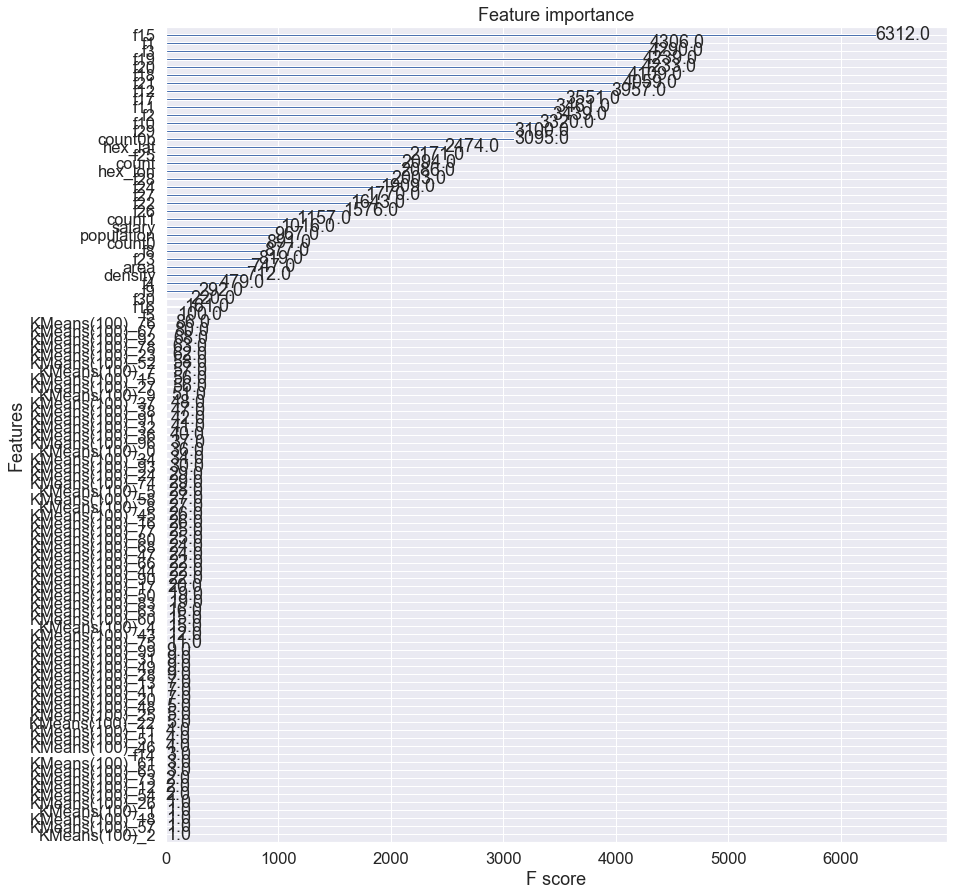

In [111]:
xgb.plot_importance(modelX)

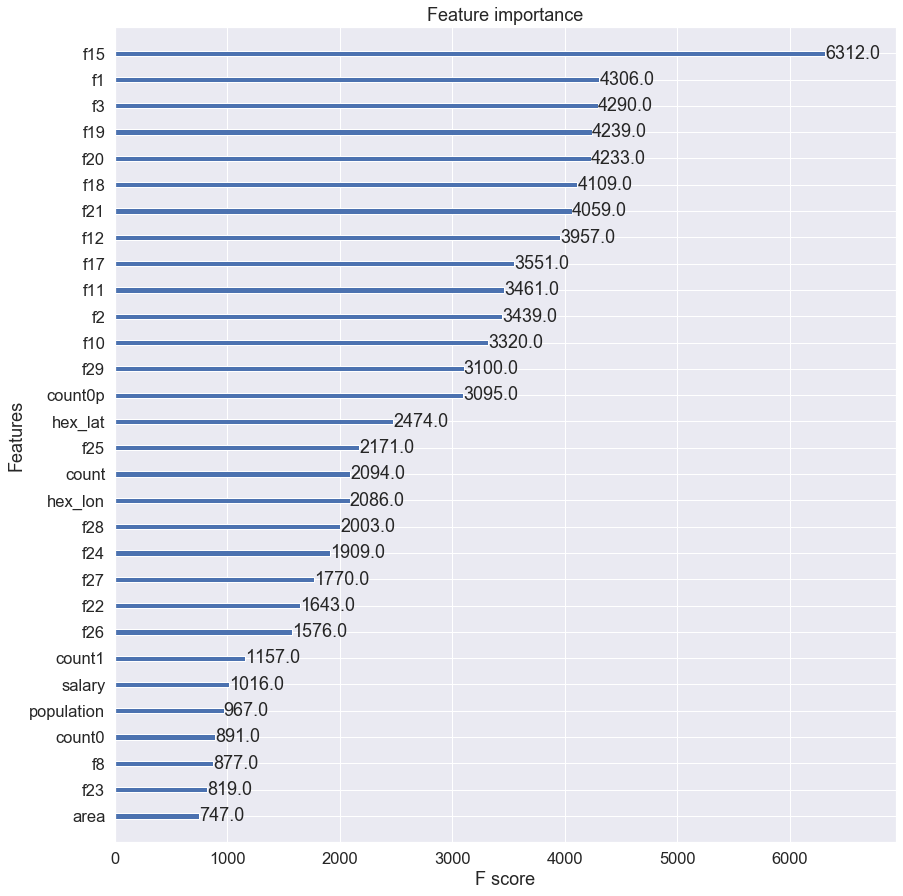

In [112]:
xgb.plot_importance(modelX, max_num_features = 30)

In [19]:
from sklearn.model_selection import GridSearchCV


In [20]:
grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': [3, 4, 6],
    'learning_rate': [0.05, 0.1, 0.3]
}

In [21]:
#  model = XGBClassifier(seed=42,
                      n_estimators=100,
                      max_depth=6,
                      learning_rate=0.3)

IndentationError: unexpected indent (<ipython-input-21-394a24c42c4e>, line 2)

In [27]:
zzz = GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, 
       colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=True, subsample=0.8), iid=True, n_jobs=-1,
       param_grid={'min_child_weight': [1, 3, 5], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)


In [28]:
zzz.fit(X_train, y_train)

XGBoostError: [08:37:34] c:\users\administrator\workspace\xgboost-win64_release_1.6.0\src\c_api\c_api_utils.h:159: Invalid missing value: null

In [25]:
sorted(zzz.cv_results_.keys())

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [26]:
zzz.grid_scores_

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'